### This is a study on data collected during a each batch of XRF runs

In [260]:
import pandas as pd
import numpy as np

df = pd.read_excel('data/crm.xlsx', parse_dates=True,index_col='DT')
df.columns =["sample","ni","fe","co","alu","sil","phos","sul","mag","cal","chrom","man","ti","xrf", "note"]
#df.info()

In [261]:
imp = ["sample",'xrf',"ni","fe","alu"]
crm = df[imp]
#crm["sample"] = crm["sample"].astype('str')
crm.head()

,sample,xrf,ni,fe,alu
DT,,,,,
2021-06-06 03:50:24.000,S1,3,0.6344,48.71,10.25
2021-06-06 09:21:36.000,S1,3,0.6342,49.41,10.47
2021-06-06 14:09:36.000,S1,2,0.6303,48.10,10.17
2021-06-06 16:17:36.960,S1,2,0.6191,48.43,10.19
2021-06-06 16:19:12.000,S1,2,0.6384,48.03,10.46


In [262]:
crm['year'] = crm.index.year
crm['month_year'] = crm.index.to_period('M')
crm['month_name'] = crm.index.month_name().str[:3]
crm['date'] = crm.index.normalize()
crm['day'] = crm.index.day_name()
crm['time'] = crm.index.time

crm.head()

/var/folders/g6/qw3t2lbx7x91r1mfyp6k77k00000gn/T/ipykernel_1055/314861720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crm['year'] = crm.index.year
/var/folders/g6/qw3t2lbx7x91r1mfyp6k77k00000gn/T/ipykernel_1055/314861720.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crm['month_year'] = crm.index.to_period('M')
/var/folders/g6/qw3t2lbx7x91r1mfyp6k77k00000gn/T/ipykernel_1055/314861720.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

,sample,xrf,ni,fe,alu,year,month_year,month_name,date,day,time
DT,,,,,,,,,,,
2021-06-06 03:50:24.000,S1,3,0.6344,48.71,10.25,2021,2021-06,Jun,2021-06-06,Sunday,03:50:24
2021-06-06 09:21:36.000,S1,3,0.6342,49.41,10.47,2021,2021-06,Jun,2021-06-06,Sunday,09:21:36
2021-06-06 14:09:36.000,S1,2,0.6303,48.10,10.17,2021,2021-06,Jun,2021-06-06,Sunday,14:09:36
2021-06-06 16:17:36.960,S1,2,0.6191,48.43,10.19,2021,2021-06,Jun,2021-06-06,Sunday,16:17:36.960000
2021-06-06 16:19:12.000,S1,2,0.6384,48.03,10.46,2021,2021-06,Jun,2021-06-06,Sunday,16:19:12


In [263]:
sample_unique=crm['sample'].unique()
elem = ["ni","fe","alu"]
sample_unique
elem

['ni', 'fe', 'alu']

<AxesSubplot:>

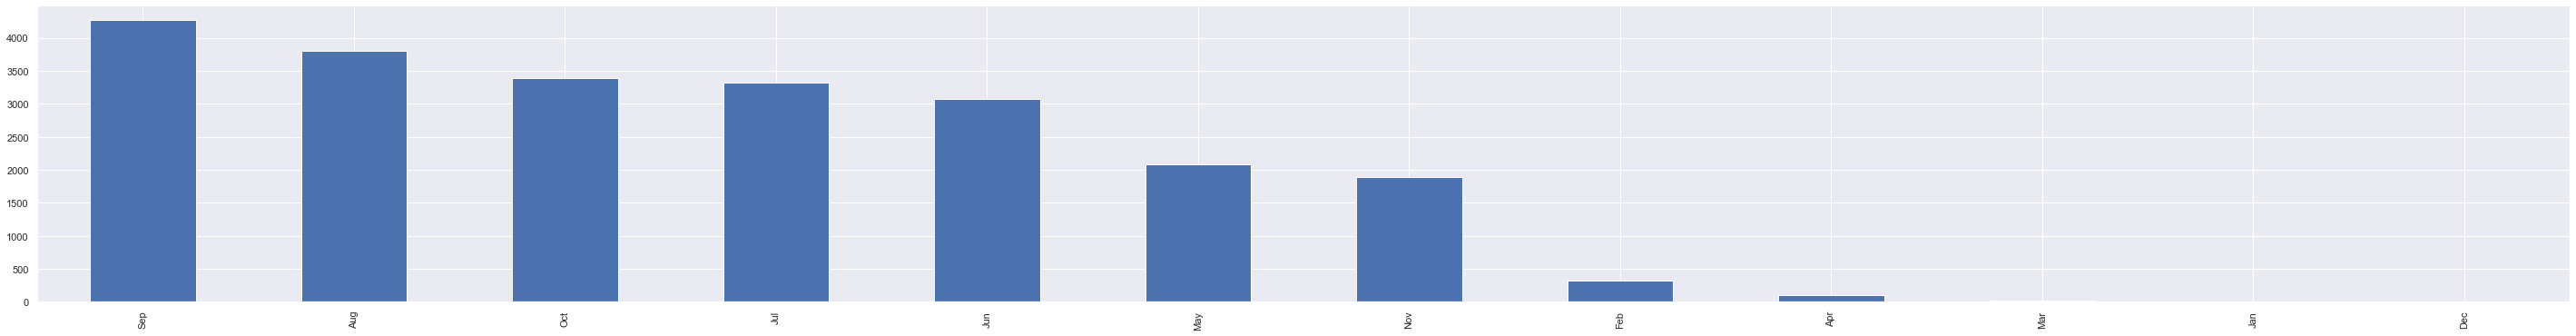

In [264]:
crm['month_name'].value_counts().plot(kind="bar")

<AxesSubplot:>

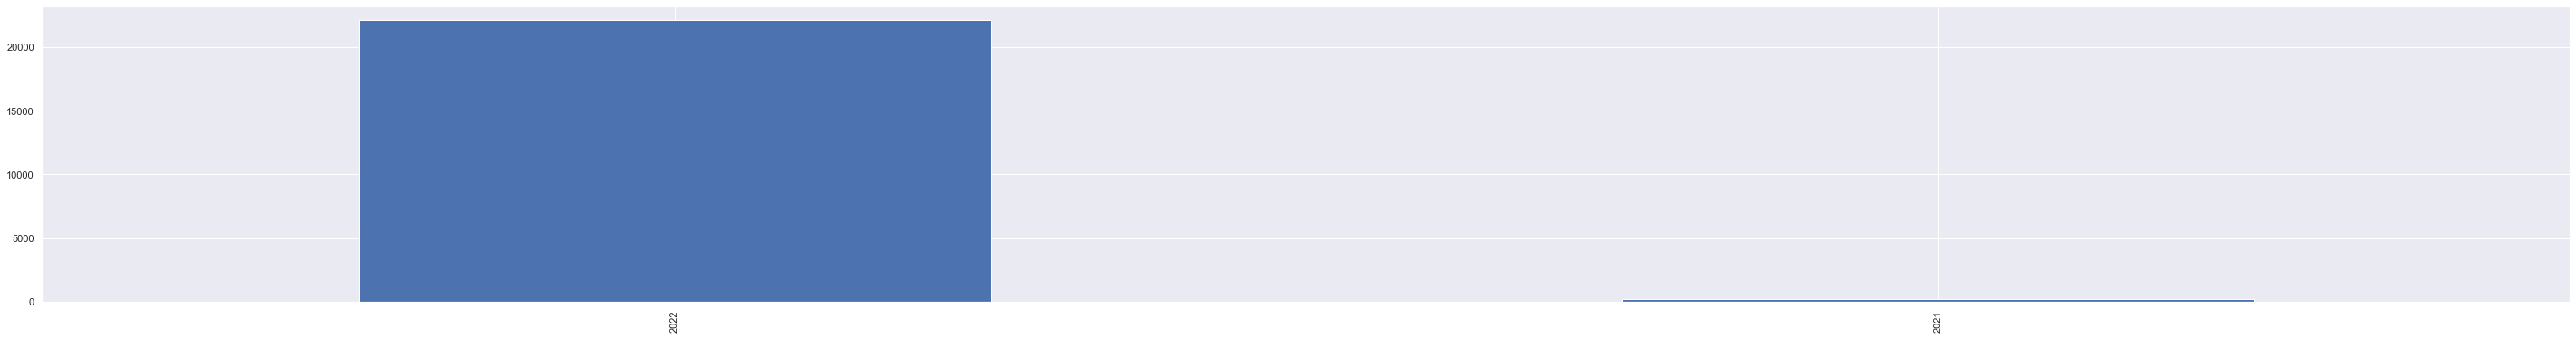

In [265]:
crm['year'].value_counts().plot(kind="bar")

<AxesSubplot:>

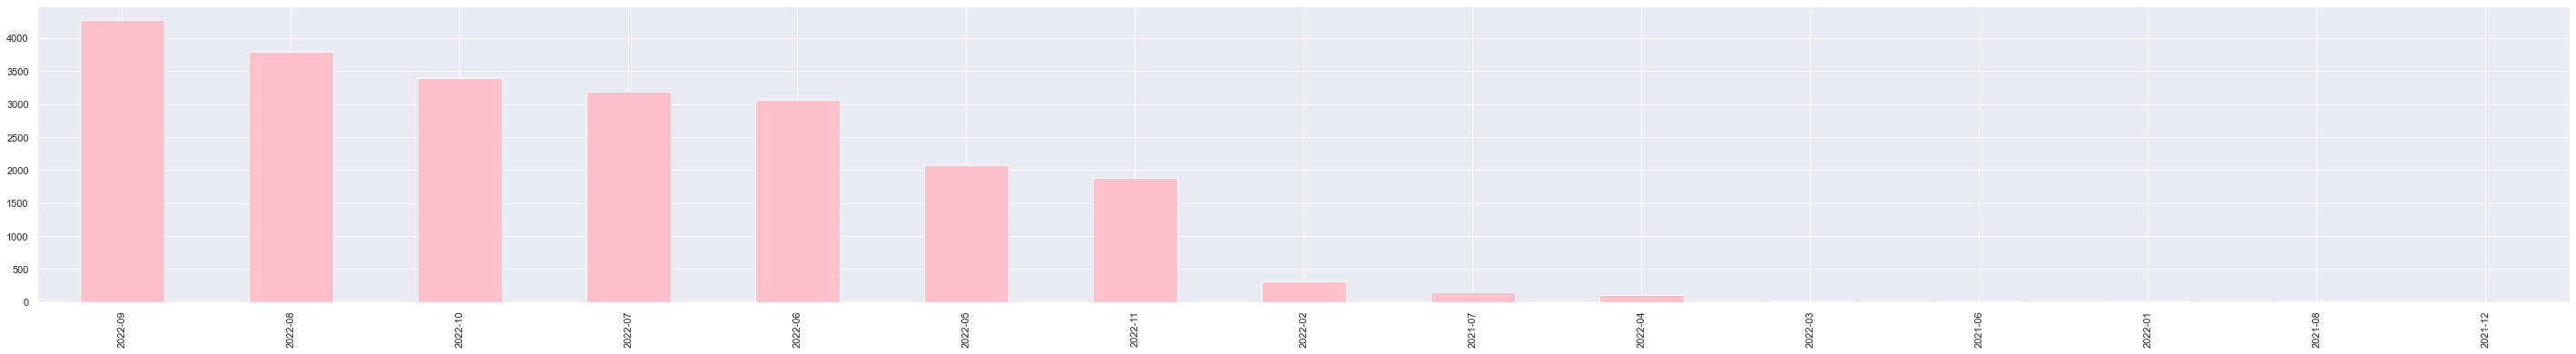

In [266]:
crm['month_year'].value_counts().plot(kind="bar", color='pink')

<AxesSubplot:>

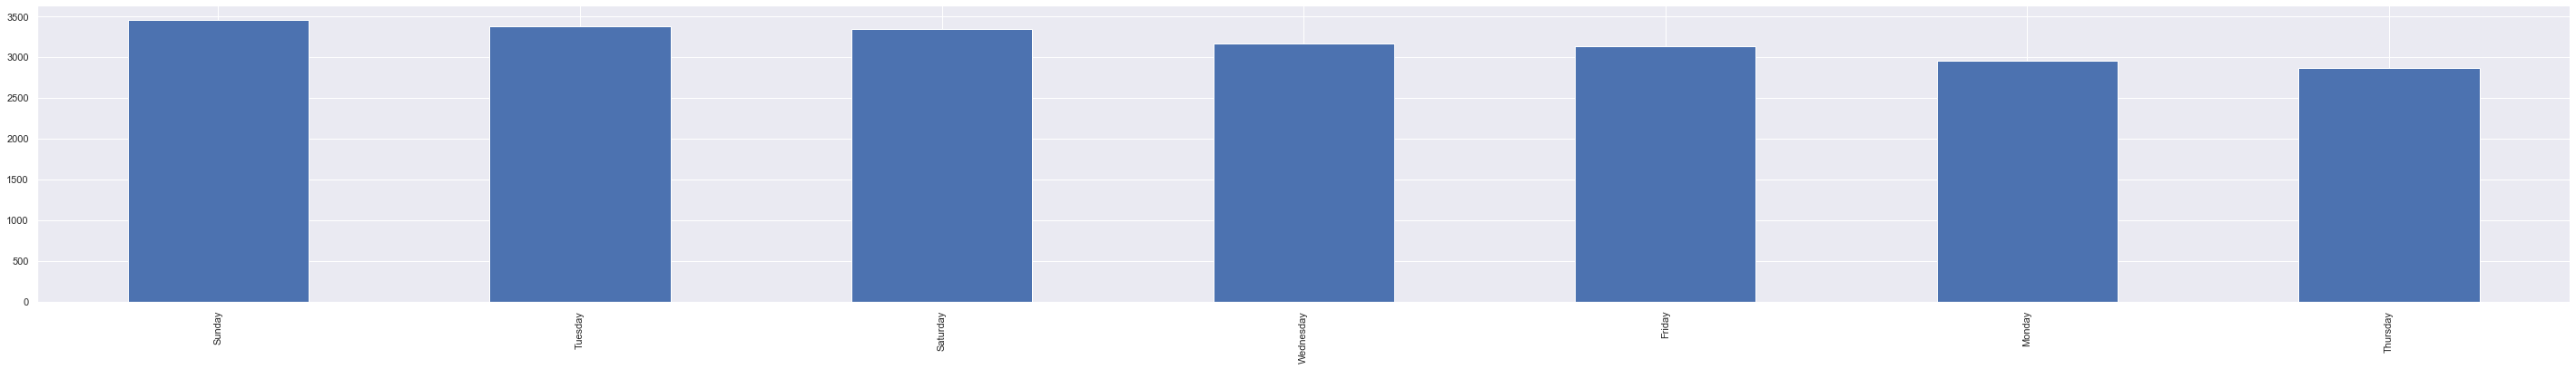

In [267]:
crm['day'].value_counts().plot(kind="bar")

<AxesSubplot:>

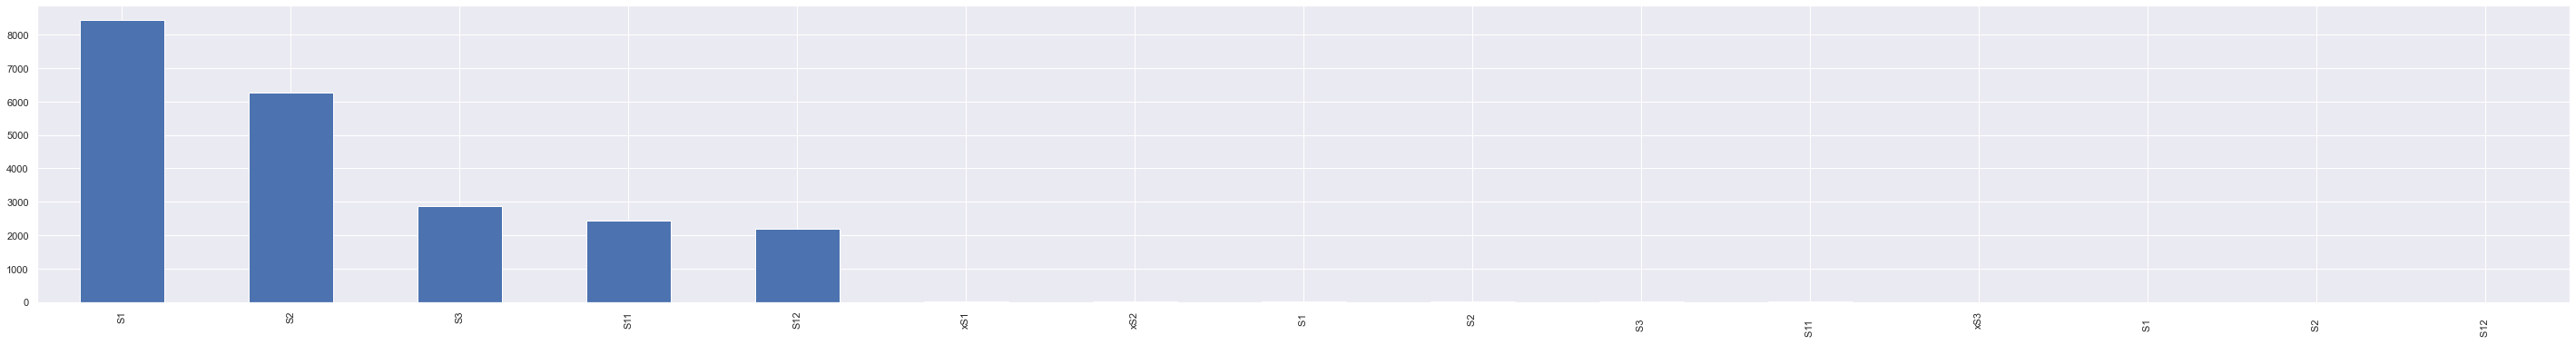

In [268]:
crm['sample'].value_counts().plot(kind="bar")

<AxesSubplot:>

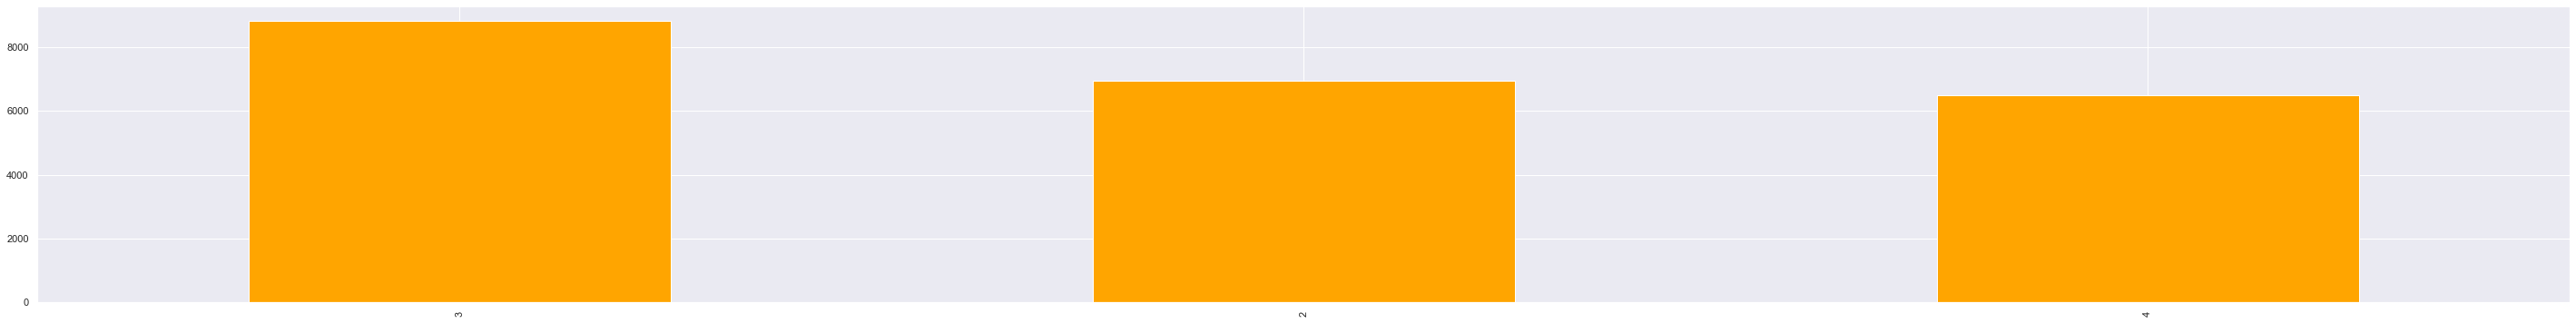

In [269]:
crm['xrf'].value_counts().plot(kind="bar", color="orange")

In [270]:
crm_hourly = crm.groupby(['xrf','sample'])[elem].resample('h').mean().dropna().reset_index()
crm_hourly.set_index('DT', inplace=True)
crm_hourly['time'] = crm_hourly.index.time
crm_hourly['month'] = crm_hourly.index.month_name().str[:3]
crm_hourly['year'] = crm_hourly.index.year
crm_hourly.reset_index()

,DT,xrf,sample,ni,fe,alu,time,month,year
0,2021-06-06 14:00:00,2,S1,0.630300,48.10,10.170000,14:00:00,Jun,2021
1,2021-06-06 16:00:00,2,S1,0.628750,48.23,10.325000,16:00:00,Jun,2021
2,2021-06-06 21:00:00,2,S1,0.633600,48.29,10.580000,21:00:00,Jun,2021
3,2021-06-30 20:00:00,2,S1,0.636200,49.03,10.630000,20:00:00,Jun,2021
4,2021-06-30 21:00:00,2,S1,0.639100,48.89,10.690000,21:00:00,Jun,2021
...,...,...,...,...,...,...,...,...,...
13570,2022-11-22 07:00:00,4,S3,1.001600,52.97,3.335500,07:00:00,Nov,2022
13571,2022-11-23 07:00:00,4,S3,1.004000,52.93,3.333333,07:00:00,Nov,2022
13572,2022-11-25 07:00:00,4,S3,1.001275,52.82,3.357750,07:00:00,Nov,2022
13573,2022-11-25 09:00:00,4,S3,1.007000,52.98,3.386500,09:00:00,Nov,2022


In [271]:
crm22 = crm_hourly[(crm_hourly['year']>2021) & (crm_hourly['sample']=='S1')]
crm22.reset_index(inplace=True)

<AxesSubplot:>

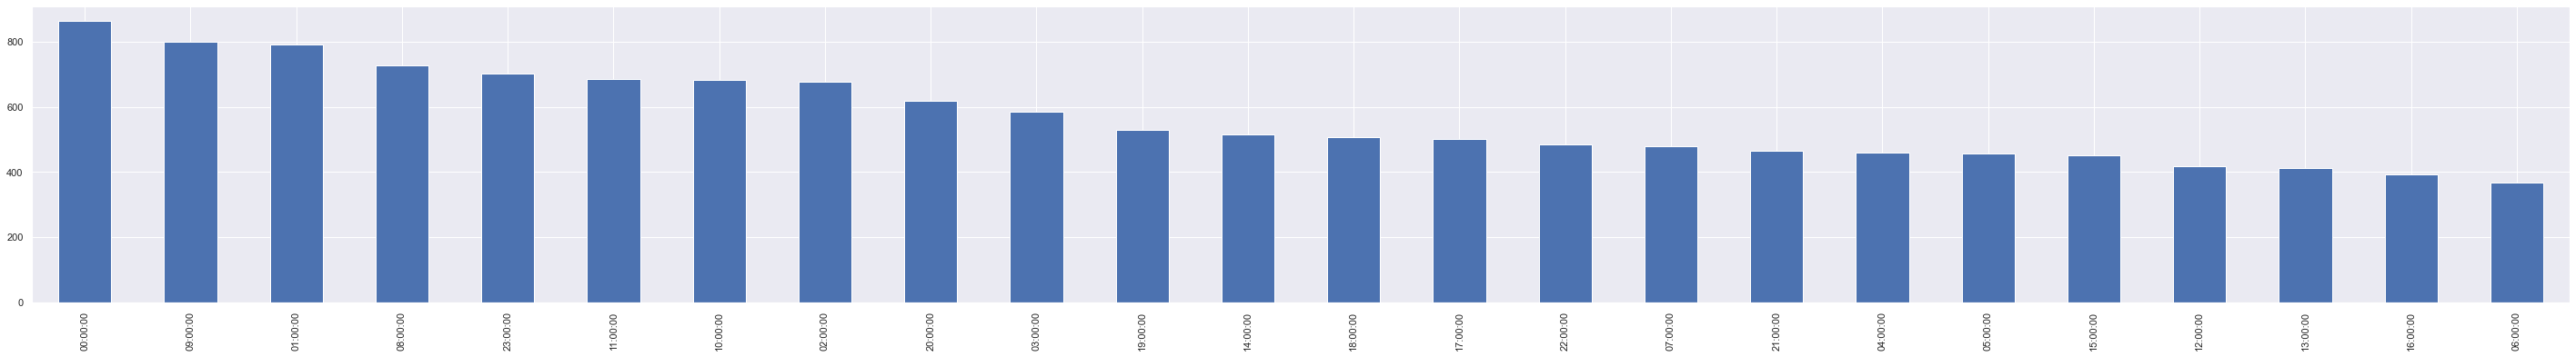

In [272]:
crm_hourly['time'].sort_values().value_counts().plot(kind="bar")

#1.) Daily element trend for different XRFs
#2.) Did Fe trend change with time?


In [273]:
#crm.groupby(["sample","xrf"])[elem].agg([min,max,np.mean,np.median]).round(2)
#crm22.groupby(["sample","xrf"])[elem].median().round(2)
crm22.dtypes

DT        datetime64[ns]
xrf                int64
sample            object
ni               float64
fe               float64
alu              float64
time              object
month             object
year               int64
dtype: object

In [274]:
#exercise from https://towardsdatascience.com/8-visualizations-with-python-to-handle-multiple-time-series-data-19b5b2e66dd0
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

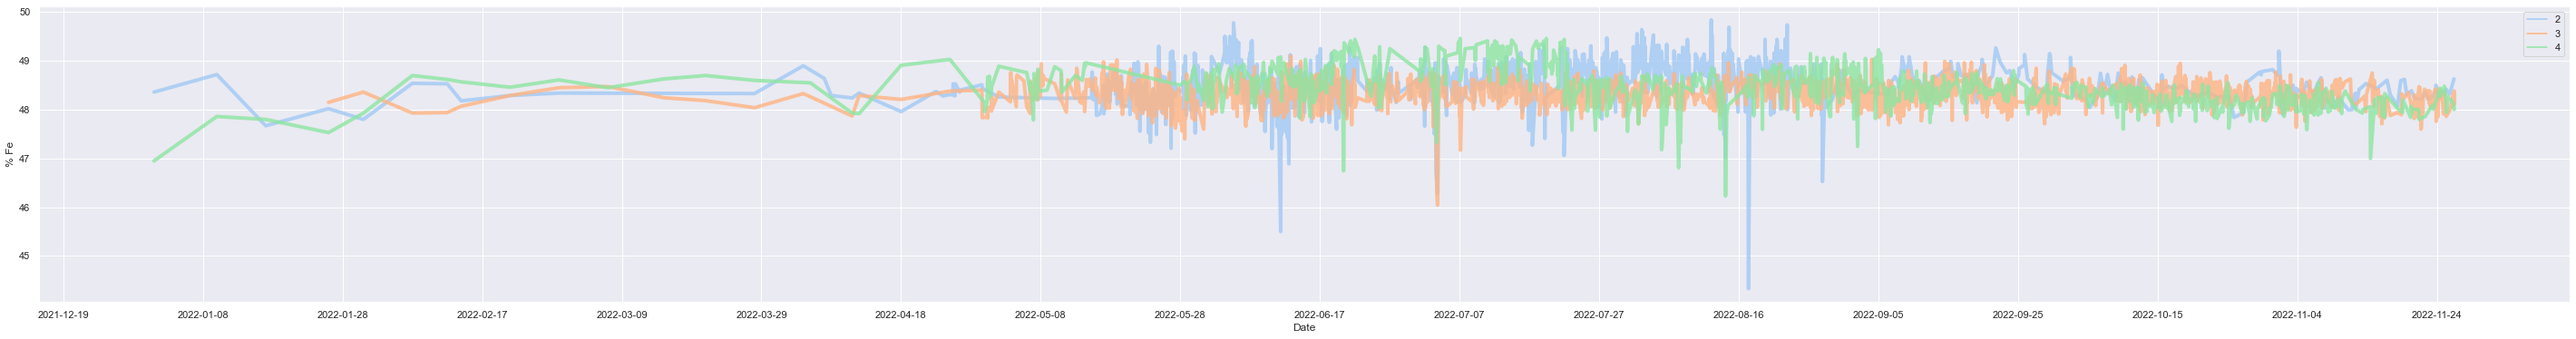

In [275]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(50,6)})

ax = sns.lineplot(data=crm22, x='DT', y='fe', hue='xrf',palette='pastel',
               legend='full', lw=4, alpha=0.8)

ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
plt.legend(bbox_to_anchor=(1,1))
plt.ylabel("% Fe")
plt.xlabel("Date")
plt.show()

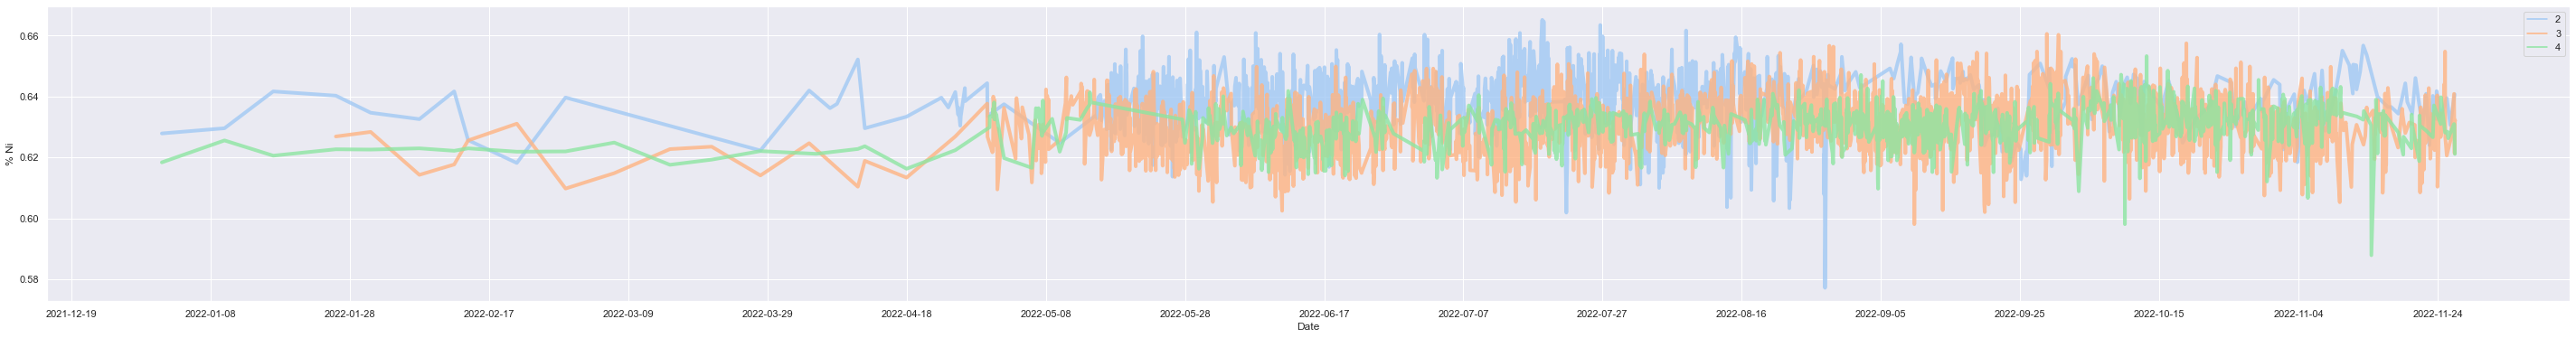

In [276]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(50,6)})

ax = sns.lineplot(data=crm22, x='DT', y='ni', hue='xrf',palette='pastel',
               legend='full', lw=4, alpha=0.8)

ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
plt.legend(bbox_to_anchor=(1,1))
plt.ylabel("% Ni")
plt.xlabel("Date")
plt.show()

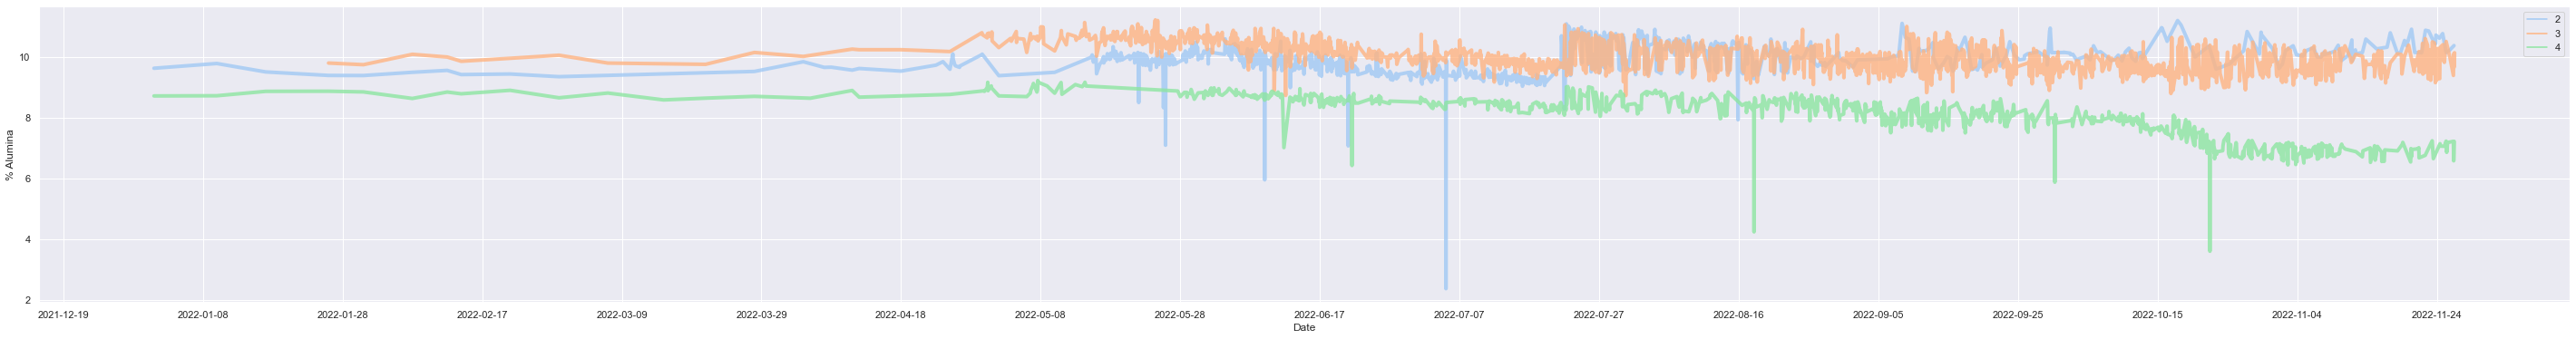

In [277]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(50,6)})

ax = sns.lineplot(data=crm22, x='DT', y='alu', hue='xrf',palette='pastel',
               legend='full', lw=4, alpha=0.8)

ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
plt.legend(bbox_to_anchor=(1,1))
plt.ylabel("% Alumina")
plt.xlabel("Date")
plt.show()

mar30
may27
jul22-
sept2

In [278]:
crm22_s2 = crm_hourly[(crm_hourly['year']>2021) & (crm_hourly['sample']=='S2')]
crm22_s2.reset_index(inplace=True)

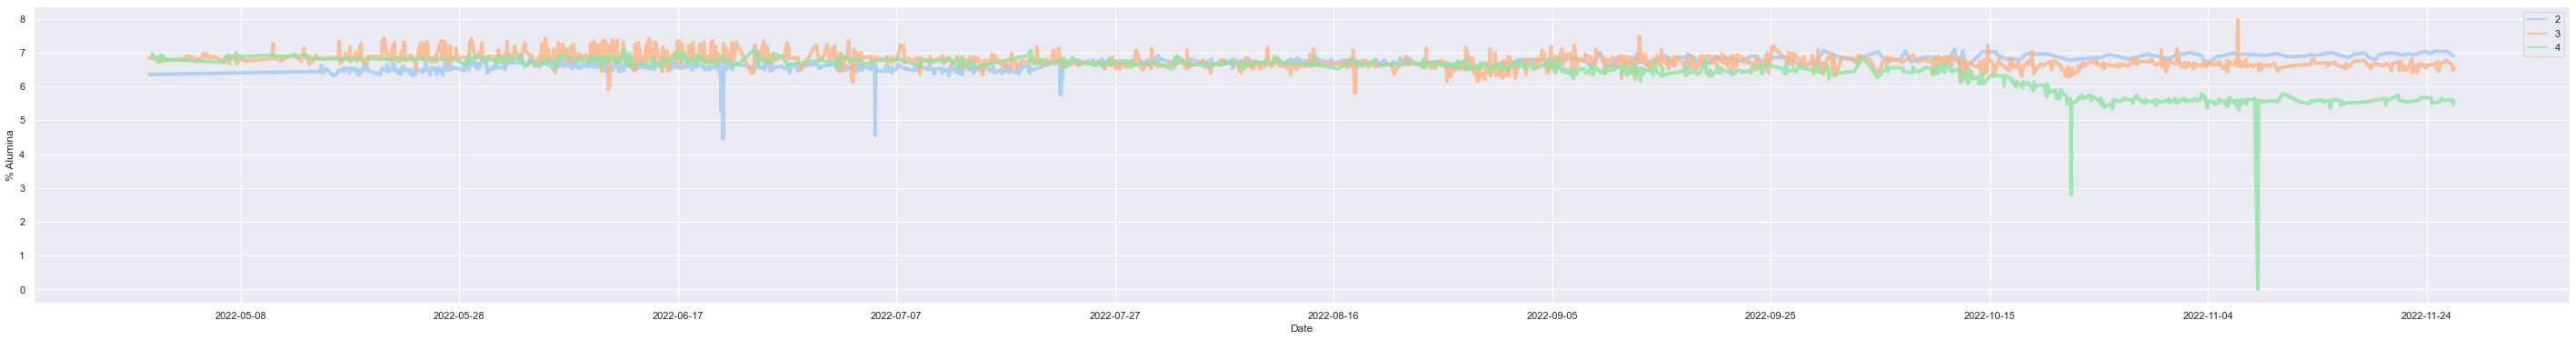

In [279]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(50,6)})

ax = sns.lineplot(data=crm22_s2, x='DT', y='alu', hue='xrf',palette='pastel',
               legend='full', lw=4, alpha=0.8)

ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
plt.legend(bbox_to_anchor=(1,1))
plt.ylabel("% Alumina")
plt.xlabel("Date")
plt.show()

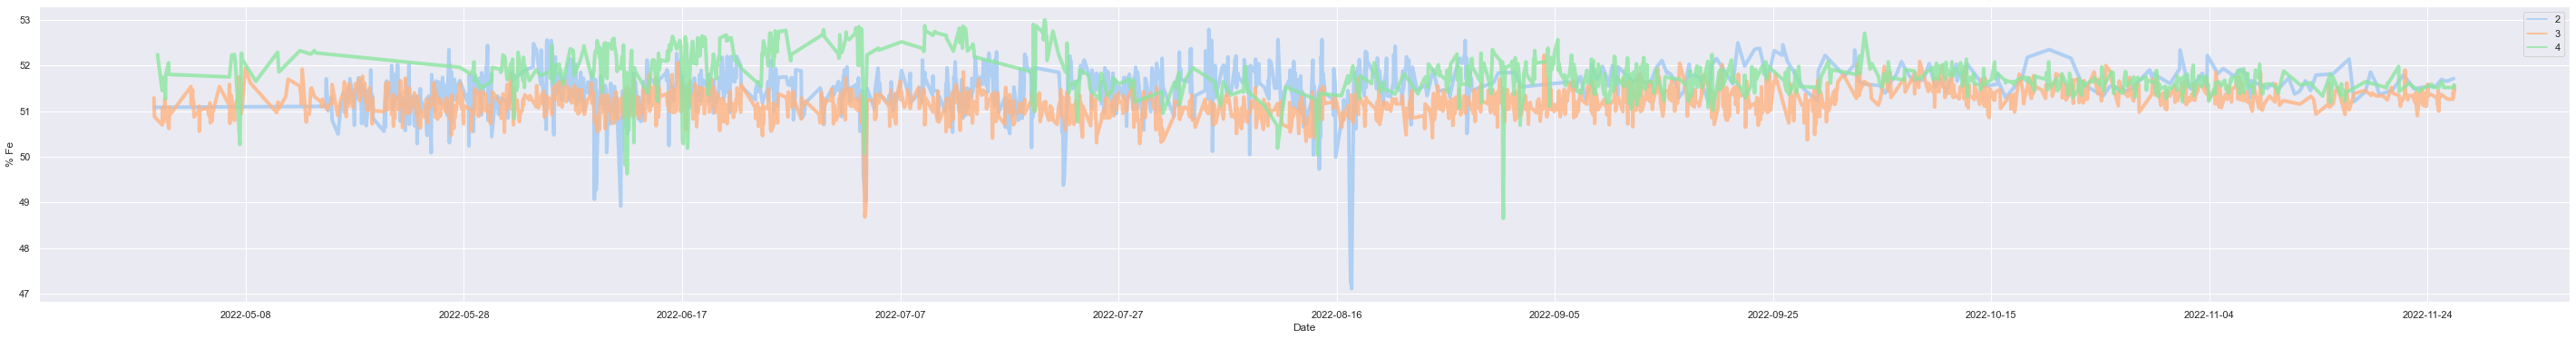

In [280]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(50,6)})

ax = sns.lineplot(data=crm22_s2, x='DT', y='fe', hue='xrf',palette='pastel',
               legend='full', lw=4, alpha=0.8)

ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
plt.legend(bbox_to_anchor=(1,1))
plt.ylabel("% Fe")
plt.xlabel("Date")
plt.show()

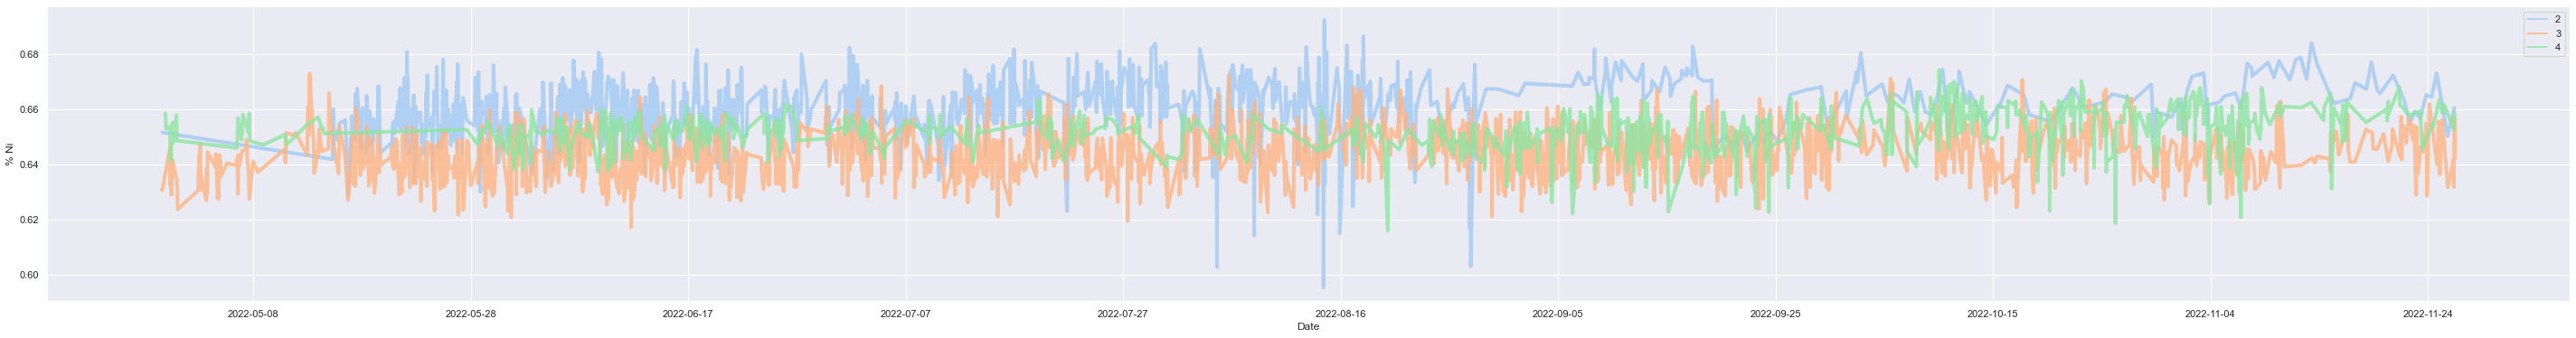

In [281]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(50,6)})

ax = sns.lineplot(data=crm22_s2, x='DT', y='ni', hue='xrf',palette='pastel',
               legend='full', lw=4, alpha=0.8)

ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
plt.legend(bbox_to_anchor=(1,1))
plt.ylabel("% Ni")
plt.xlabel("Date")
plt.show()

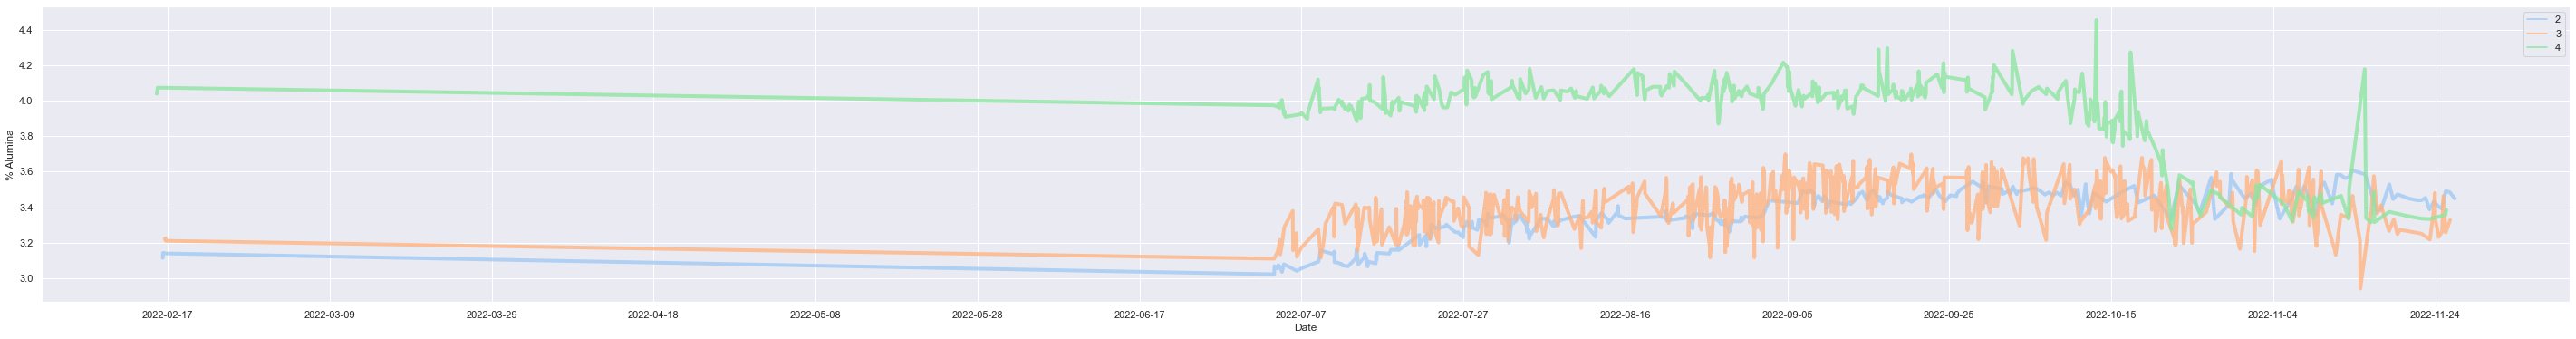

In [282]:
crm22_s3 = crm_hourly[(crm_hourly['year']>2021) & (crm_hourly['sample']=='S3')]
crm22_s3.reset_index(inplace=True)
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(50,6)})

ax = sns.lineplot(data=crm22_s3, x='DT', y='alu', hue='xrf',palette='pastel',
               legend='full', lw=4, alpha=0.8)

ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
plt.legend(bbox_to_anchor=(1,1))
plt.ylabel("% Alumina")
plt.xlabel("Date")
plt.show()

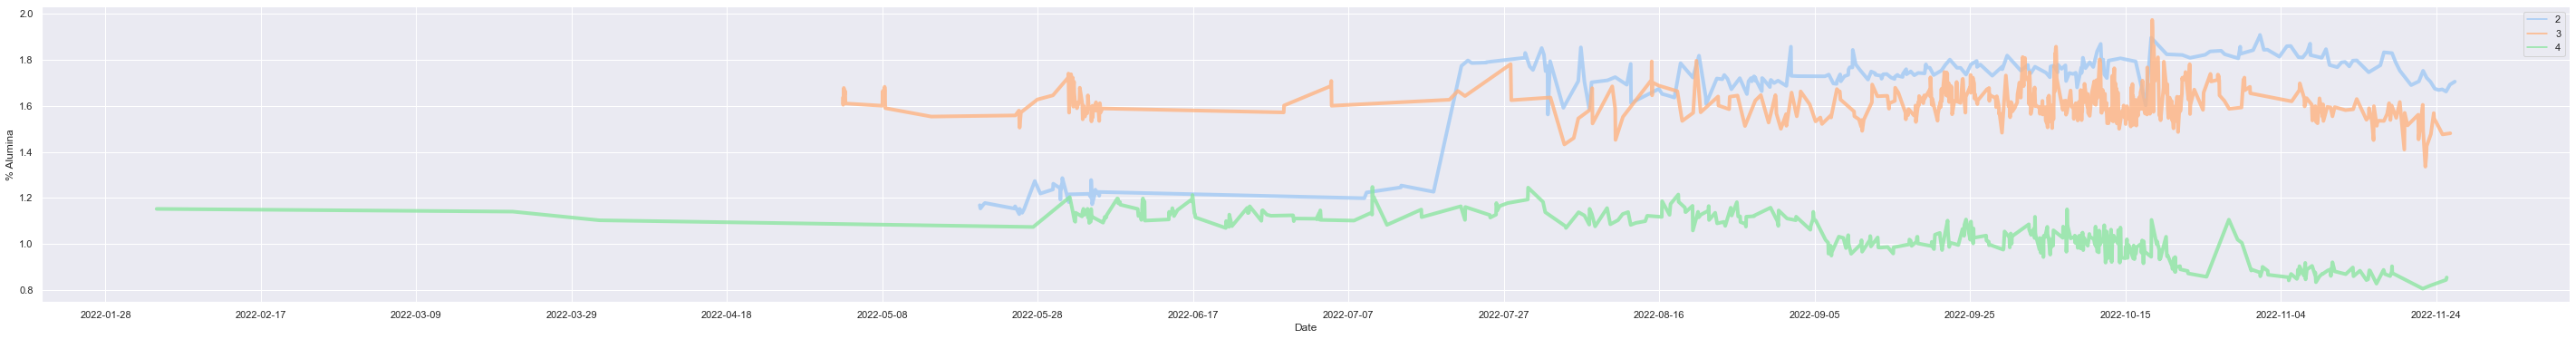

In [283]:
crm22_s11 = crm_hourly[(crm_hourly['year']>2021) & (crm_hourly['sample']=='S11')]
crm22_s11.reset_index(inplace=True)
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(50,6)})

ax = sns.lineplot(data=crm22_s11, x='DT', y='alu', hue='xrf',palette='pastel',
               legend='full', lw=4, alpha=0.8)

ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
plt.legend(bbox_to_anchor=(1,1))
plt.ylabel("% Alumina")
plt.xlabel("Date")
plt.show()

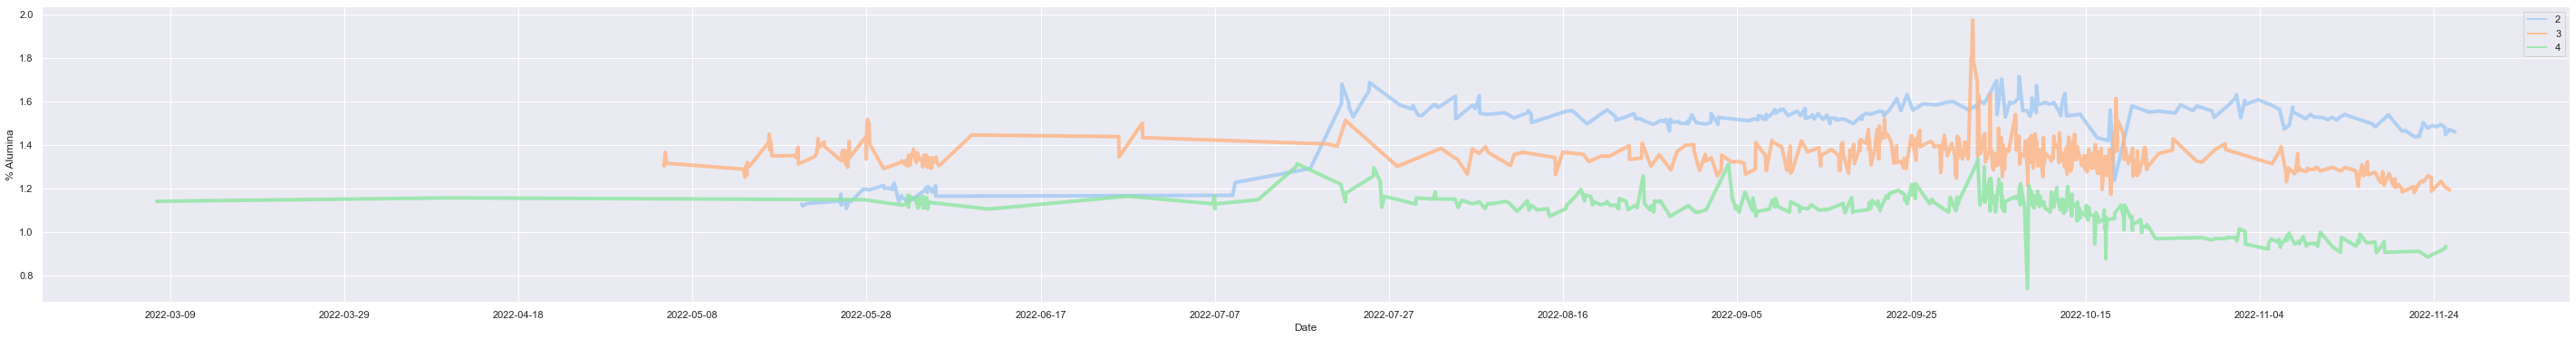

In [284]:
crm22_s12 = crm_hourly[(crm_hourly['year']>2021) & (crm_hourly['sample']=='S12')]
crm22_s12.reset_index(inplace=True)
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(50,6)})

ax = sns.lineplot(data=crm22_s12, x='DT', y='alu', hue='xrf',palette='pastel',
               legend='full', lw=4, alpha=0.8)

ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
plt.legend(bbox_to_anchor=(1,1))
plt.ylabel("% Alumina")
plt.xlabel("Date")
plt.show()

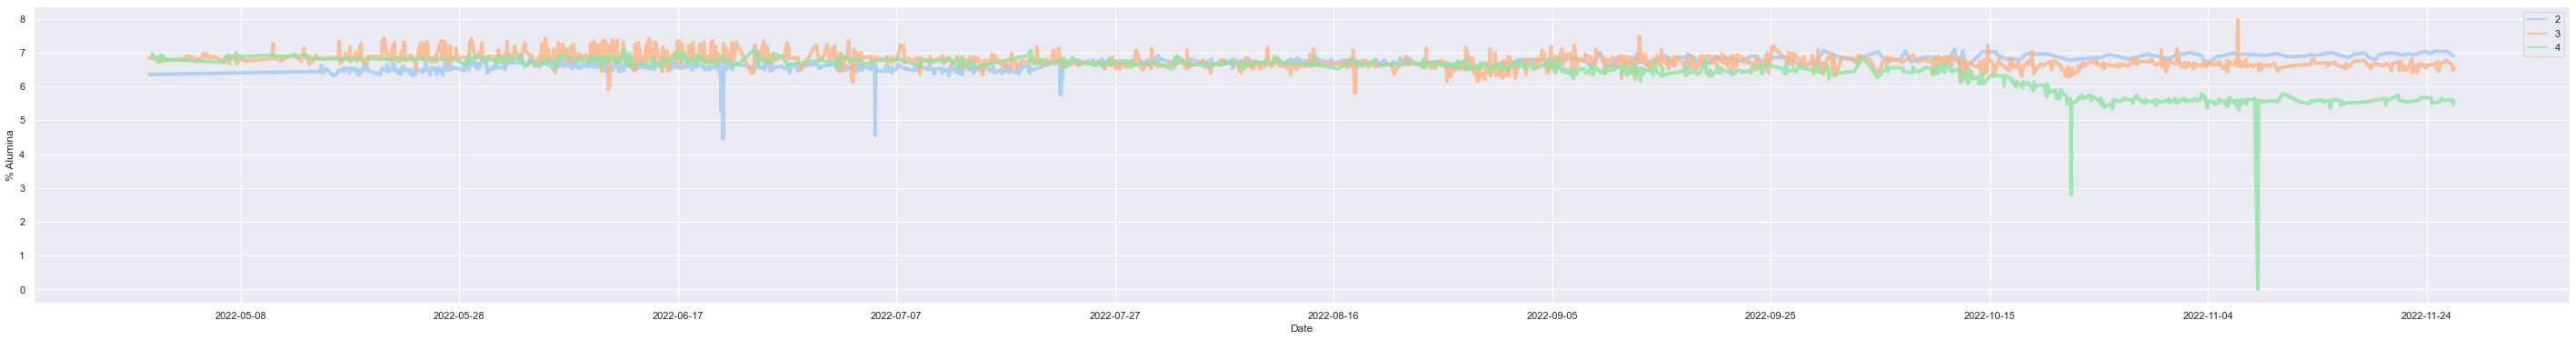

In [285]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(50,6)})

ax = sns.lineplot(data=crm22_s2, x='DT', y='alu', hue='xrf',palette='pastel',
               legend='full', lw=4, alpha=0.8)

ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
plt.legend(bbox_to_anchor=(1,1))
plt.ylabel("% Alumina")
plt.xlabel("Date")
plt.show()

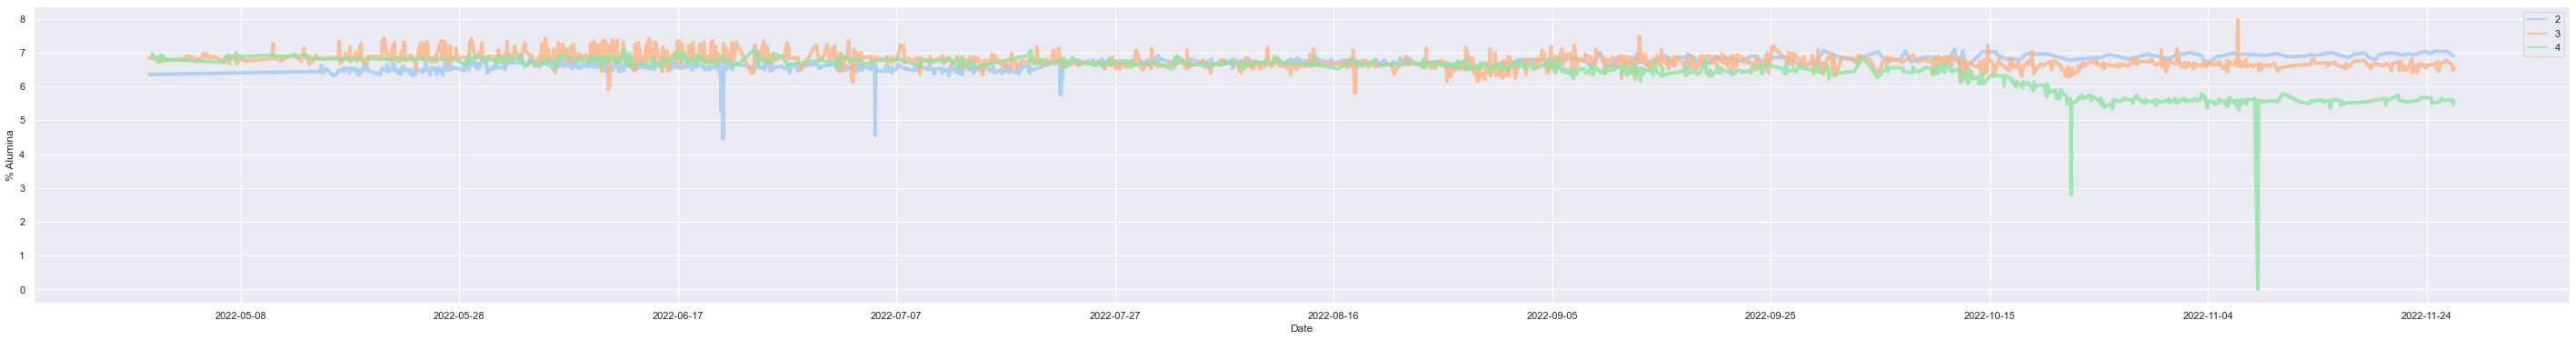

In [286]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(50,6)})

ax = sns.lineplot(data=crm22_s2, x='DT', y='alu', hue='xrf',palette='pastel',
               legend='full', lw=4, alpha=0.8)

ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
plt.legend(bbox_to_anchor=(1,1))
plt.ylabel("% Alumina")
plt.xlabel("Date")
plt.show()